<a href="https://colab.research.google.com/github/kevin-oliveira178/Felicidade_Mudial/blob/main/Felicidade_mundial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importação de bibliotecas

In [95]:
!pip install pycountry-convert
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
import numpy as np
from scipy import stats





# tratamento dos dados

In [96]:

url = "https://raw.githubusercontent.com/kevin-oliveira178/Felicidade_Mudial/refs/heads/main/2019.csv"
df = pd.read_csv(url)

colunas = list(df.columns)

In [97]:
#criação das colunas adicionais

#coluna Score_Category
score = df['Score']

# calculo dos tercis
tercis = sc.quantile([0.3333, 0.6667])
tercil1 = tercis[0.3333]
tercil2 = tercis[0.6667]

In [98]:
#adicionando a coluna
def categorizar_score(score):
  new_colum = []
  for i in score:
      if i <= tercil1:
          new_colum.append("Baixo")
      elif i > tercil1 and i <= tercil2:
          new_colum.append("Médio")
      elif i > tercil2:
          new_colum.append("alto")
  return new_colum

df["Score_Category"]= categorizar_score(df["Score"])





In [99]:
#criação da tab_Score_category de frequência da variável Score_Category

tab_Score_category = df["Score_Category"].value_counts()




In [100]:
#definindo a função que cria a coluna de continentes




def add_continent_column(df, country_col):
    def get_continent(country):
        try:
            country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
            continent_code = pc.country_alpha2_to_continent_code(country_code)
            continent_name = {
                'AF': 'Africa',
                'NA': 'North America',
                'OC': 'Oceania',
                'AN': 'Antarctica',
                'AS': 'Asia',
                'EU': 'Europe',
                'SA': 'South America'
            }.get(continent_code, 'Unknown')
            return continent_name
        except:
            return 'Unknown'

    df['continent'] = df[country_col].apply(get_continent)
    return df


In [101]:
#chmando a função
df = add_continent_column(df, 'Country or region')

# parte 1


In [102]:
#descrição da variável score
score = df["Score"]

# Descrição da variável score
media = score.mean()
moda = score.mode()
mediana = score.median()

# medidas de dispersão
amplitude = score.max() - score.min()
desvio_medio = np.mean(np.abs(score - score.mean()))
variancia = score.var(ddof=1)         # ddof=1 → variância amostral
desvio_padrao = score.std(ddof=1)
coef_variacao = (desvio_padrao / score.mean()) * 100
iqr = score.quantile(0.75) - score.quantile(0.25)
quartil_1 = score.quantile(0.25)
quartil_2 = score.quantile(0.5)
quartil_3 = score.quantile(0.75)


leitura dos coeficientes de disperção

In [103]:
print('\n média \n', media,
      '\nmoda\n',moda,
      '\nmediana\n',mediana,
      '\namplitude total\n',amplitude,
      '\ndesvio padrão/n',desvio_medio,
      '\nvariancia\n',variancia,
      '\ndesvio padrão',desvio_padrao,
      '\ncoef de variação\n',coef_variacao,
      '\namplitude interquartilica\n',iqr,
      '\nprimeiro quartil\n',quartil_1,
      '\nsegundo quartil\n',quartil_2,
      '\nterceiro quartil\n',quartil_3)



 média 
 5.407096153846155 
moda
 0    5.208
Name: Score, dtype: float64 
mediana
 5.3795 
amplitude total
 4.916 
desvio padrão/n 0.9166486686390534 
variancia
 1.239035842307692 
desvio padrão 1.1131198687956712 
coef de variação
 20.586278422363378 
amplitude interquartilica
 1.6399999999999997 
primeiro quartil
 4.5445 
segundo quartil
 5.3795 
terceiro quartil
 6.1845


construção do histograma e box plot



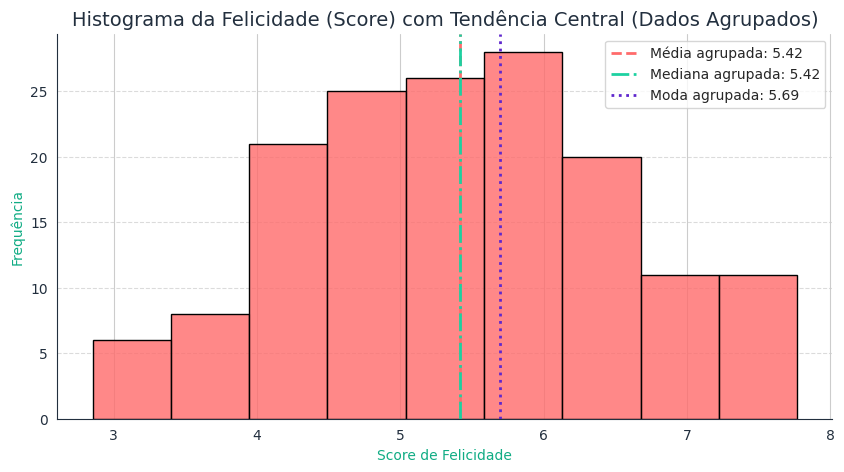

In [106]:
# Paleta personalizada
colors = ["#ff6b6b", "#feca57", "#48dbfb", "#1dd1a1", "#5f27cd"]
background_color = "#ffffff"
text_color = "#222f3e"
accent_color = "#10ac84"

# Função para definir número de classes pelo método de Sturges
def sturges_classes(series):
    n = len(series)
    return int(np.ceil(1 + 3.3 * np.log10(n)))

# Etapa 1: Criar classes (agrupamento)
k = sturges_classes(score)
min_val = score.min()
max_val = score.max()
bins = np.linspace(min_val, max_val, k + 1)

# Etapa 2: Criar tabela de frequência
df_freq = pd.DataFrame({
    'classe_inferior': bins[:-1],
    'classe_superior': bins[1:]
})
df_freq['amplitude'] = df_freq['classe_superior'] - df_freq['classe_inferior']
df_freq['ponto_medio'] = (df_freq['classe_inferior'] + df_freq['classe_superior']) / 2

# Contar quantos valores caem em cada intervalo (classe)
df_freq['frequencia'] = pd.cut(score, bins=bins, include_lowest=True).value_counts(sort=False).values
df_freq['fac'] = df_freq['frequencia'].cumsum()

# Etapa 3: Média agrupada
media_agrupada = (df_freq['frequencia'] * df_freq['ponto_medio']).sum() / df_freq['frequencia'].sum()

# Etapa 4: Mediana agrupada
N = df_freq['frequencia'].sum()
N2 = N / 2
classe_mediana_idx = df_freq[df_freq['fac'] >= N2].index[0]
L = df_freq.loc[classe_mediana_idx, 'classe_inferior']
F = df_freq.loc[classe_mediana_idx - 1, 'fac'] if classe_mediana_idx > 0 else 0
f_m = df_freq.loc[classe_mediana_idx, 'frequencia']
h = df_freq.loc[classe_mediana_idx, 'amplitude']
mediana_agrupada = L + ((N2 - F) / f_m) * h

# Etapa 5: Moda agrupada (Czuber)
classe_modal_idx = df_freq['frequencia'].idxmax()
f1 = df_freq.loc[classe_modal_idx, 'frequencia']
f0 = df_freq.loc[classe_modal_idx - 1, 'frequencia'] if classe_modal_idx > 0 else 0
f2 = df_freq.loc[classe_modal_idx + 1, 'frequencia'] if classe_modal_idx < len(df_freq) - 1 else 0
L_modal = df_freq.loc[classe_modal_idx, 'classe_inferior']
h_modal = df_freq.loc[classe_modal_idx, 'amplitude']
moda_agrupada = L_modal + ((f1 - f0) / ((f1 - f0) + (f1 - f2))) * h_modal if (f1 - f0 + f1 - f2) != 0 else np.nan

# Etapa 6: Plotar o histograma com linhas das medidas
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid", {"axes.facecolor": background_color})
sns.set_palette(sns.color_palette(colors))

# Histograma com os mesmos bins usados no agrupamento
sns.histplot(score, bins=bins, edgecolor='black', alpha=0.8)

# Linhas verticais das medidas agrupadas
plt.axvline(media_agrupada, color='#ff6b6b', linestyle='--', linewidth=2, label=f'Média agrupada: {media_agrupada:.2f}')
plt.axvline(mediana_agrupada, color='#1dd1a1', linestyle='-.', linewidth=2, label=f'Mediana agrupada: {mediana_agrupada:.2f}')
if not np.isnan(moda_agrupada):
    plt.axvline(moda_agrupada, color='#5f27cd', linestyle=':', linewidth=2, label=f'Moda agrupada: {moda_agrupada:.2f}')

# Estilo e legendas
plt.title(f'Histograma da Felicidade (Score) com Tendência Central (Dados Agrupados)', color=text_color, fontsize=14)
plt.xlabel('Score de Felicidade', color=accent_color)
plt.ylabel('Frequência', color=accent_color)
plt.xticks(color=text_color)
plt.yticks(color=text_color)
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color(text_color)
plt.gca().spines['bottom'].set_color(text_color)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.gcf().set_facecolor(background_color)
plt.show()

# parte 2

# parte 3